No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{-3: -2.61624879689403, -1.5: -1.41421429157036, 0: -0.106998156217514, 1.5: 1.53678017435013, 3: 3.24564473431136}


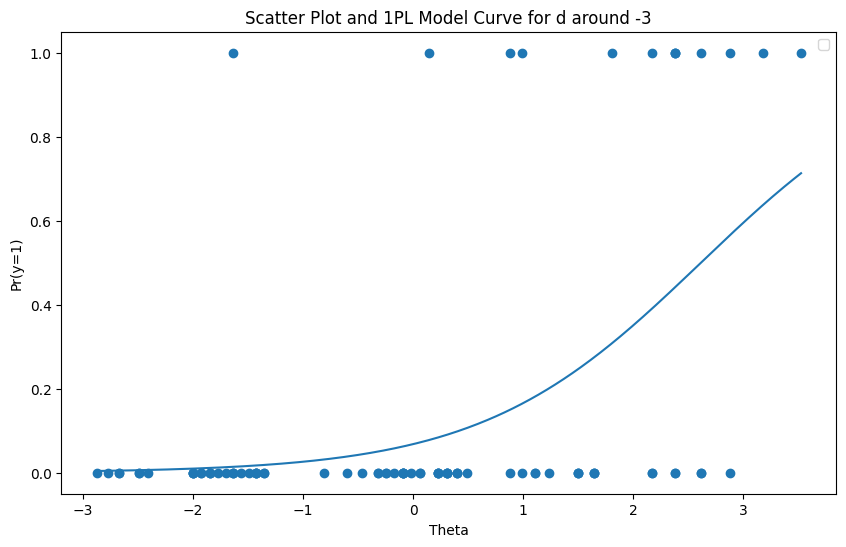

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


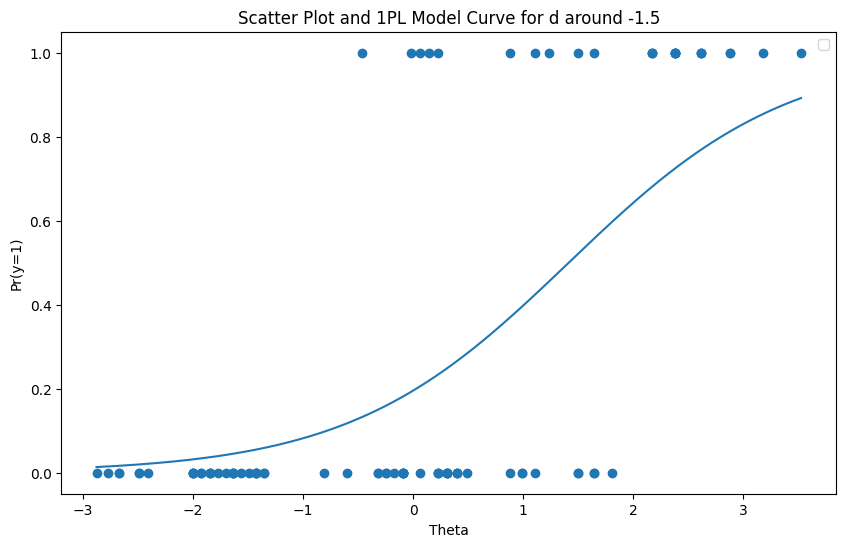

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


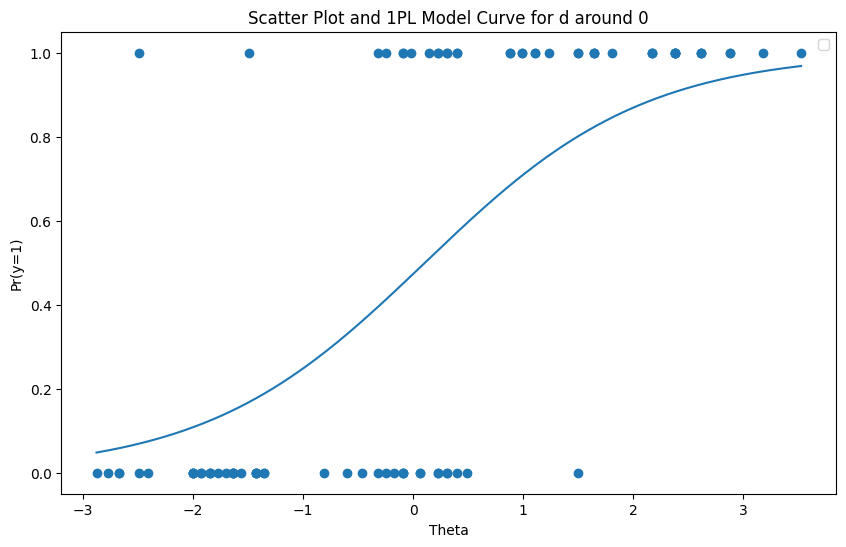

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


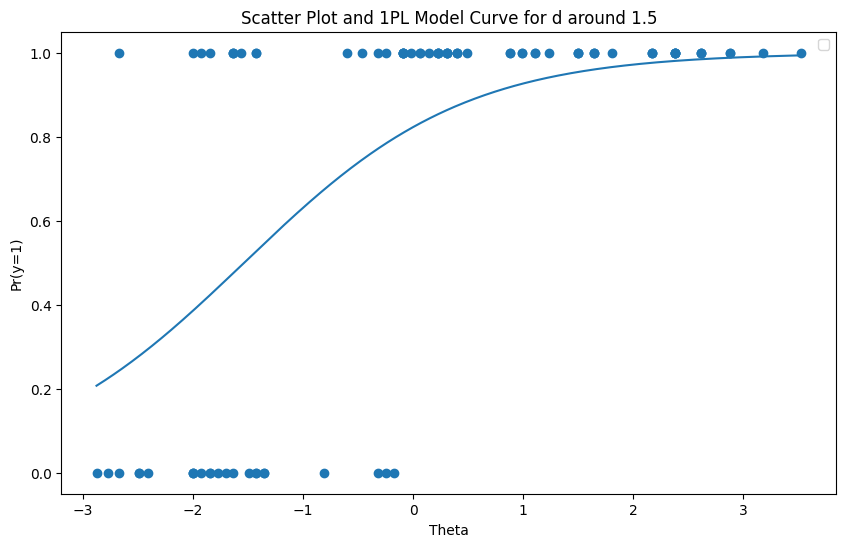

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


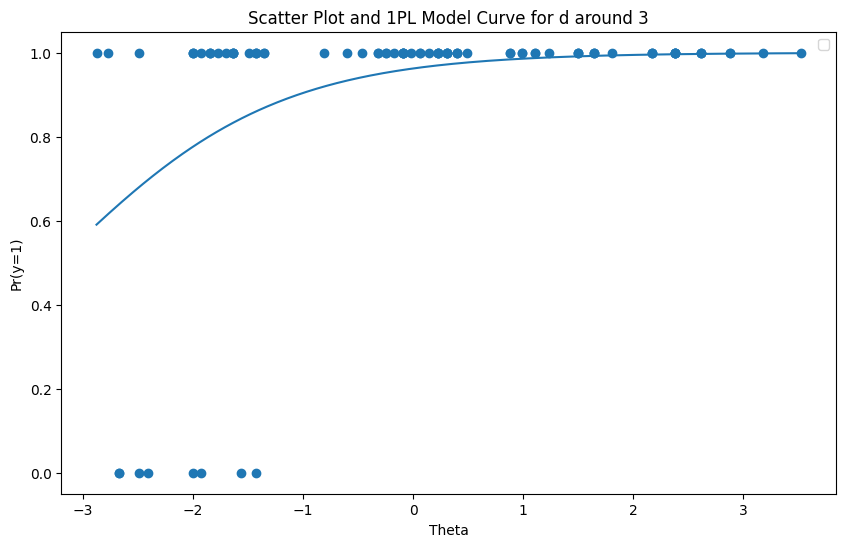

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fn_1PL(theta, d):
    return 1 / (1 + np.exp(-(theta + d)))

base_coef_1PL = pd.read_csv('model_coef/divided_base_coef_1PL_clean.csv', usecols=[1])
base_value_1PL = base_coef_1PL.iloc[:,0].values

target_points = [-3, -1.5, 0, 1.5, 3]
closest_points = {target: base_value_1PL[np.abs(base_value_1PL - target).argmin()] for target in target_points}
print(closest_points)

closest_points_indices = {target: np.abs(base_value_1PL - target).argmin() for target in target_points}

theta_df = pd.read_csv('theta/divided_base_theta_1PL.csv', usecols=[1])
theta = theta_df.iloc[:,0].values
# print(theta.shape)

for target in closest_points.keys():
    d = closest_points[target]
    indice = closest_points_indices[target]

    y_df = pd.read_csv('clean_data/divided_base_matrix.csv')
    y = y_df.iloc[:,indice+1].values
    # print(y.shape)

    plt.figure(figsize=(10, 6))

    plt.scatter(theta, y)
    
    theta_range = np.linspace(min(theta), max(theta), 500)
    y_curve = fn_1PL(theta_range, d)
    plt.plot(theta_range, y_curve)
    
    plt.xlabel('Theta')
    plt.ylabel('Pr(y=1)')
    plt.title(f'Scatter Plot and 1PL Model Curve for d around {target}')
    plt.legend()
    plt.show()